In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/Users/microwave/AIO_2024/Module_3/dataset')

df = pd.read_csv('opsd_germany_daily.csv')

df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [9]:
df = pd.read_csv('opsd_germany_daily.csv',index_col = 0, parse_dates= True)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()
df.sample(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2011-12-04,1144.17200,302.836,NaN,NaN,2011,12,Sunday
2010-06-19,1125.19000,123.394,NaN,NaN,2010,6,Saturday
2014-03-10,1479.23000,94.246,145.402,239.648,2014,3,Monday
2017-11-21,1576.49592,318.591,11.240,329.831,2017,11,Tuesday
2007-08-07,1395.23800,NaN,NaN,NaN,2007,8,Tuesday


In [10]:
df.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [11]:
df.loc['2012-02'].head(3)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday


<AxesSubplot:xlabel='Date'>

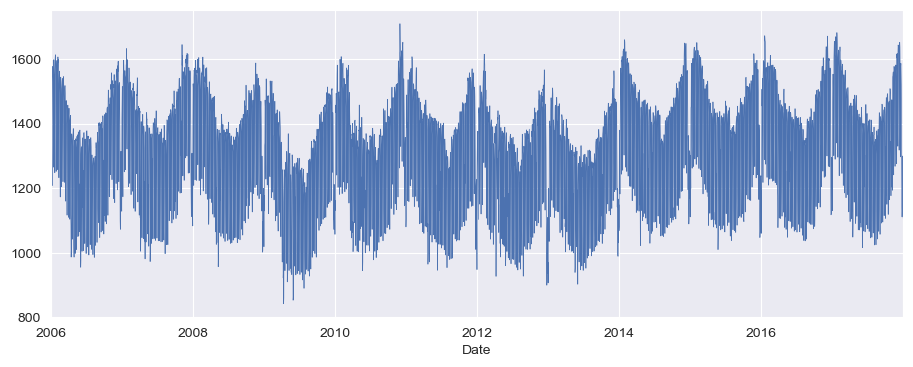

In [12]:
rc = {"axes.spines.right": False, "axes.spines.top": False,'figure.figsize':(11,4)}
sns.set(rc)
df['Consumption'].plot(linewidth=0.5)

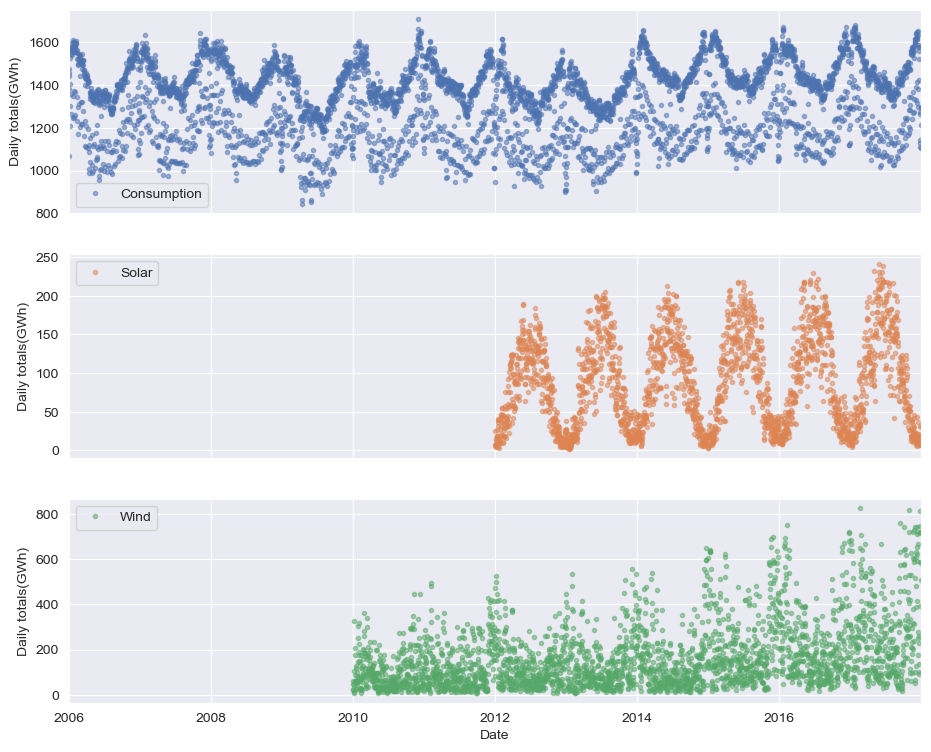

In [13]:
cols_plot = ['Consumption','Solar','Wind']
axes = df[cols_plot].plot(marker ='.',alpha = 0.5,linestyle ='None',figsize=(11,9),subplots=True)

for ax in axes:
    ax.set_ylabel('Daily totals(GWh)')
plt.show()

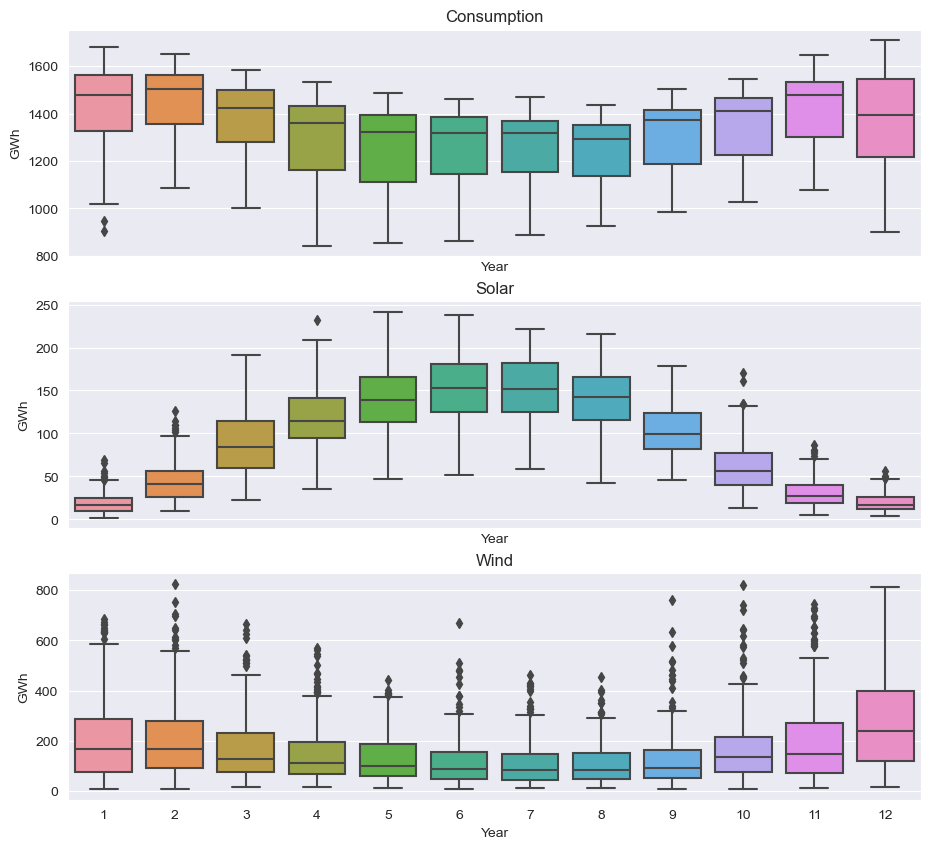

In [20]:
fig, axes = plt.subplots(3,1,figsize=(11,10),sharex=True)
for name, ax in zip(['Consumption','Solar','Wind'],axes):
    sns.boxplot(data=df,x='Month',y=name,ax=ax)
    ax.set_ylabel("GWh")
    ax.set_xlabel("Year")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_label("")

In [24]:
pd.date_range('1998-03-10','1998-03-15',freq='D')
time_sample = pd.to_datetime(['2013-02-03','2013-02-06','2013-02-08'])
consum_samp = df.loc[time_sample,['Consumption']].copy()
consum_samp

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [28]:
consum_freg = consum_samp.asfreq('D')
consum_freg['Consumption - Forward Fill'] = consum_samp.asfreq('D',method = 'ffill')
consum_freg

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [29]:
data_col = ['Consumption','Wind','Solar','Wind+Solar']
df_mean = df[data_col].resample('W').mean()
df_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [30]:
df_7d = df[data_col].rolling(7,center = True).mean()
df_7d

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


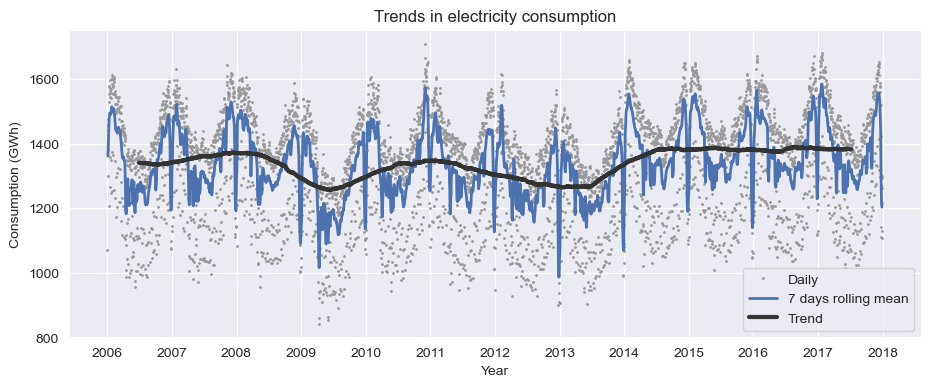

In [33]:
import matplotlib.dates as mdates
df_365d = df[data_col].rolling(window = 365,center = True,min_periods=360).mean()

fig,ax = plt.subplots()
ax.plot(df['Consumption'],marker = ".",markersize=2,color='0.6',linestyle='None',label = 'Daily')
ax.plot(df_7d['Consumption'],linewidth=2, label='7 days rolling mean')
ax.plot(df_365d['Consumption'],color='0.2',linewidth=3, label='Trend')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in electricity consumption')
plt.show()

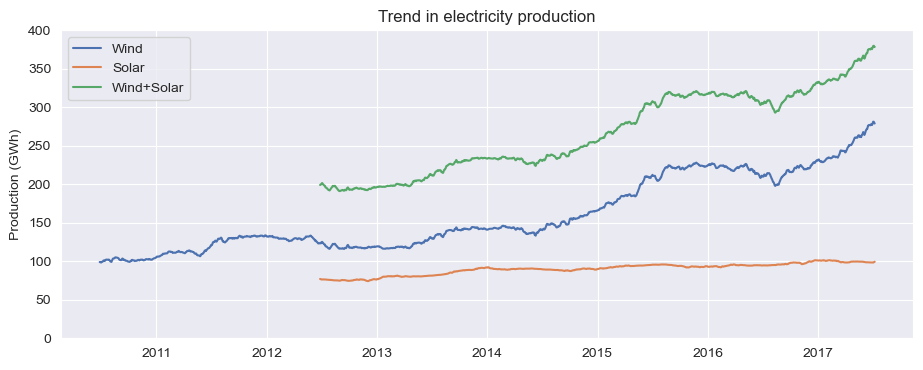

In [34]:
fig,ax = plt.subplots()
for name in ['Wind','Solar','Wind+Solar']:
    ax.plot(df_365d[name],label= name)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0,400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trend in electricity production')
plt.show()